[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week8_Implementing_K_Means_coding_challenge1.ipynb)

## In this CC, we will implement K-Means clustering algorithm from scratch

Objectives:
1. Be able to list and understand steps of K-Mean algorithm
2. Be able to implement those steps.
3. Understand their computational complexity

For a deeper look into k-means, take a look at https://en.wikipedia.org/wiki/K-means_clustering

### Pseudo-Code:

1. Pick a random starting point c_k for k clusters.
2. For each point, add it to the set $S_k$ of the centroid $c_k$ it is closest to.
3. Recompute each $c_k$ as the mean (centroid) of each set $S_k$.
4. Do until $c_k$ doesn't change for any $k$ (or max iter is hit).

In [0]:

'''
K-means steps:
    Pick a random starting point c_k for k clusters
    For each point, add it to the set S_k of the centroid it is closest to
    Recompute c_k as the mean (centroid of the set S_k)
    Do until c_k doesn't change for any k
    
    
For large collections of points iteration till convergence can take very long time.
Some predefined number of iterations is used to make it feasible
'''

# Set up some hyper-parameters:

max_iterations = 5000
k = 3

(300, 2)


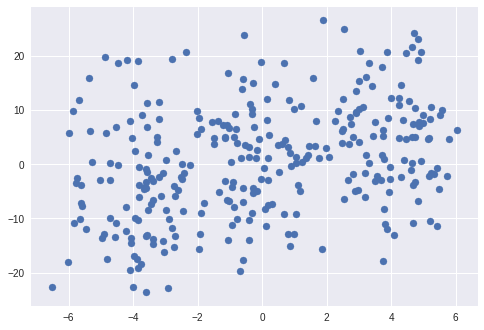

In [28]:
# Define some points in 3 clusters and plot them
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[1, 0], [0, 100]] , 100))))
print (points.shape)
plt.scatter(points[:, 0], points[:, 1])

In [29]:
# Choose k random points from the set to be our starting "centroids"
centroids = np.random.permutation(points)[:k]
centroids

array([[ -3.07884875, -14.25409271],
       [ -2.2452208 ,  -0.1018615 ],
       [ -3.44872591,  -2.60273065]])

In [0]:
# Write a function that returns the centroid that is nearest to it
def distance(points,centroids):
  return np.argmin(np.linalg.norm(points-centroids, axis = 1))

# Write a function that uses the above function, computing which centroid is 
# nearest to _every_ point
def nearest_centroid(points,centroids):
  clusters = [distance(point,centroids) for point in points]
  return np.array(clusters)
closest = nearest_centroid(points,centroids)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


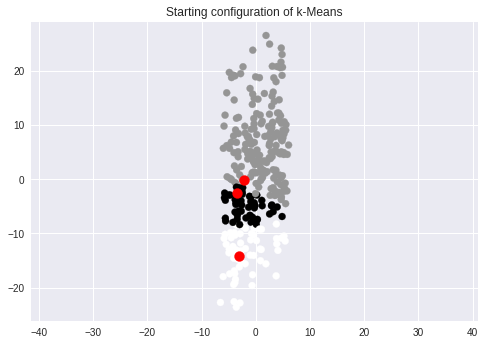

In [31]:
plt.scatter(points[:, 0], points[:, 1],c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)    
plt.axes().set_aspect('equal', 'datalim')
plt.title('Starting configuration of k-Means')
plt.show()

In [0]:
# Recalculate the centroids for each cluster based on the points that were added
# to it.
def recalculate_centroids(points,closest,centroids):
    centroids = [np.mean(points[closest==k], axis=0) for c in range(k)]
    return np.array(centroids)

In [33]:
# Run the above functions max_iter times and plot the result
for _ in range(max_iterations):
    clusters = nearest_centroid(points, centroids)
    new_centroids = recalculate_centroids(points, clusters, k)
    if (new_centroids==centroids).all():
        break

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


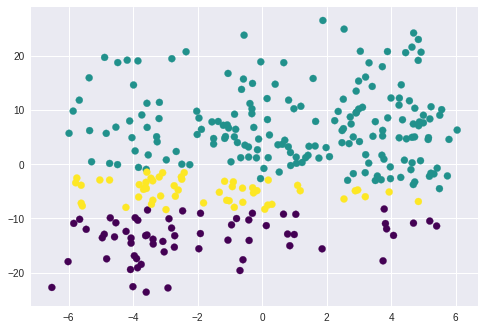

In [34]:
plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis');